In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.environ['KAGGLE_USERNAME'] = 'yuvinmahawatta'
os.environ['KAGGLE_KEY'] = 'KGAT_df2ed3c1848ffa067145abd9588cca8a'

In [4]:
!kaggle datasets download -d "rishisukumar/student-screen-time-vs-cgpa-analysis-2026"

Dataset URL: https://www.kaggle.com/datasets/rishisukumar/student-screen-time-vs-cgpa-analysis-2026
License(s): CC0-1.0




  0%|          | 0.00/6.86k [00:00<?, ?B/s]
100%|██████████| 6.86k/6.86k [00:00<00:00, 7.74MB/s]


In [5]:
import zipfile
with zipfile.ZipFile("student-screen-time-vs-cgpa-analysis-2026.zip", 'r') as zip_ref:
    zip_ref.extractall("student_screen_time_dataset")

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [10]:
df = pd.read_csv("student_screen_time_dataset\Student_Performance_2026.csv")
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\User\AppData\Local\Temp\ipykernel_35528\2336754052.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("student_screen_time_dataset\Student_Performance_2026.csv")


,student_ID,Age,Gender,daily_screen_time_hours,social_media_hours,online_study_hours,gaming_hours,sleep_hours,attendance_percentage,offline_study_hours,previous_sem_CGPA,current_sem_CGPA
0,S011,23,Female,6.2,2.5,3.8,1.2,7.1,79,2.6,7.74,7.94
1,S012,24,Female,4.9,2.0,5.1,1.0,8.3,79,2.6,7.72,7.92
2,S013,18,Female,7.9,3.2,2.1,1.6,7.1,68,2.3,6.67,6.87
3,S014,17,Male,10.0,4.0,0.0,2.0,5.9,63,2.1,6.10,6.30
4,S015,23,Female,7.7,3.1,2.3,1.5,6.4,69,2.3,6.77,6.97


In [22]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [23]:
df.head(5)

,student_ID,Age,Gender,daily_screen_time_hours,social_media_hours,online_study_hours,gaming_hours,sleep_hours,attendance_percentage,offline_study_hours,previous_sem_CGPA,current_sem_CGPA
0,S011,23,0,6.2,2.5,3.8,1.2,7.1,79,2.6,7.74,7.94
1,S012,24,0,4.9,2.0,5.1,1.0,8.3,79,2.6,7.72,7.92
2,S013,18,0,7.9,3.2,2.1,1.6,7.1,68,2.3,6.67,6.87
3,S014,17,1,10.0,4.0,0.0,2.0,5.9,63,2.1,6.10,6.30
4,S015,23,0,7.7,3.1,2.3,1.5,6.4,69,2.3,6.77,6.97


In [24]:
print(df.corr(numeric_only=True)['current_sem_CGPA'].sort_values(ascending=False))

previous_sem_CGPA          1.000000
current_sem_CGPA           1.000000
attendance_percentage      0.999703
offline_study_hours        0.997367
online_study_hours         0.875822
sleep_hours                0.822879
Gender                     0.032408
Age                        0.018070
gaming_hours              -0.868207
social_media_hours        -0.875532
daily_screen_time_hours   -0.875822
Name: current_sem_CGPA, dtype: float64


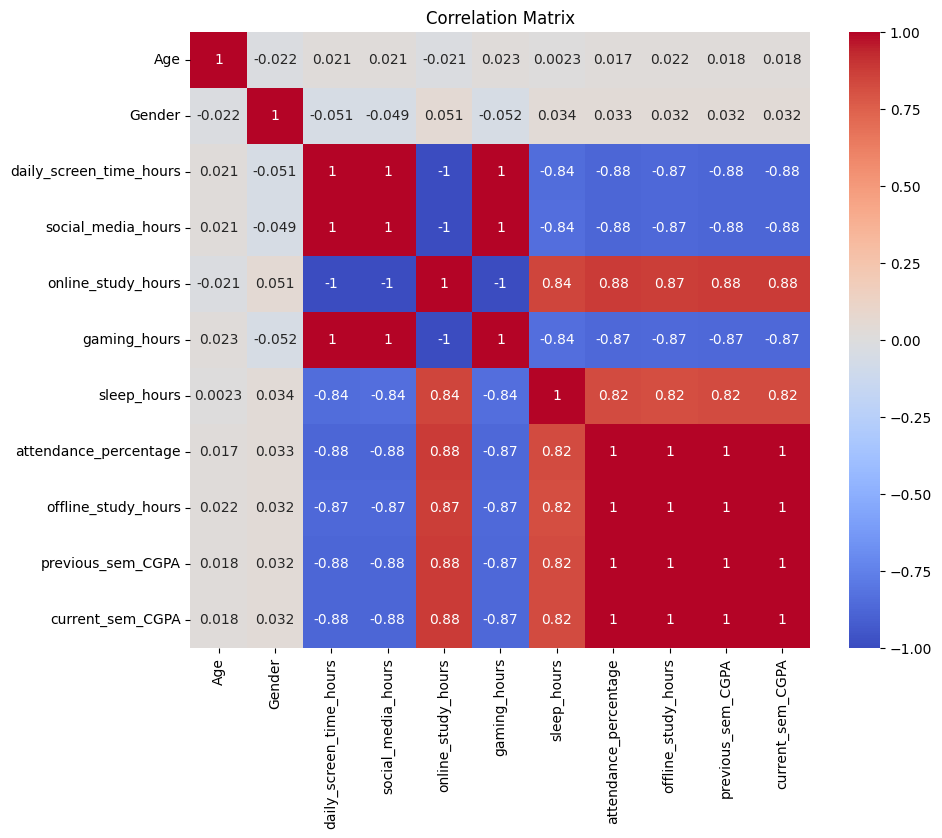

In [25]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
df.drop(columns = ['Gender','Age'])


,student_ID,daily_screen_time_hours,social_media_hours,online_study_hours,gaming_hours,sleep_hours,attendance_percentage,offline_study_hours,previous_sem_CGPA,current_sem_CGPA
0,S011,6.2,2.5,3.8,1.2,7.1,79,2.6,7.74,7.94
1,S012,4.9,2.0,5.1,1.0,8.3,79,2.6,7.72,7.92
2,S013,7.9,3.2,2.1,1.6,7.1,68,2.3,6.67,6.87
3,S014,10.0,4.0,0.0,2.0,5.9,63,2.1,6.10,6.30
4,S015,7.7,3.1,2.3,1.5,6.4,69,2.3,6.77,6.97
...,...,...,...,...,...,...,...,...,...,...
541,S552,4.1,1.6,5.9,0.8,8.2,78,2.6,7.63,7.83
542,S553,6.4,2.6,3.6,1.3,7.5,79,2.6,7.74,7.94
543,S554,8.3,3.3,1.7,1.7,6.0,58,1.9,5.62,5.82
544,S555,9.8,3.9,0.2,2.0,6.3,64,2.2,6.29,6.49


In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_ID               546 non-null    str    
 1   Age                      546 non-null    int64  
 2   Gender                   546 non-null    int64  
 3   daily_screen_time_hours  546 non-null    float64
 4   social_media_hours       546 non-null    float64
 5   online_study_hours       546 non-null    float64
 6   gaming_hours             546 non-null    float64
 7   sleep_hours              546 non-null    float64
 8   attendance_percentage    546 non-null    int64  
 9   offline_study_hours      546 non-null    float64
 10  previous_sem_CGPA        546 non-null    float64
 11  current_sem_CGPA         546 non-null    float64
dtypes: float64(8), int64(3), str(1)
memory usage: 51.3 KB


In [28]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [34]:
print(df.shape)

(546, 12)


In [29]:
cleaned_dataset = df.to_csv("cleaned_student_performance.csv", index=False)

In [32]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x

,student_ID,Age,Gender,daily_screen_time_hours,social_media_hours,online_study_hours,gaming_hours,sleep_hours,attendance_percentage,offline_study_hours,previous_sem_CGPA
0,S011,23,0,6.2,2.5,3.8,1.2,7.1,79,2.6,7.74
1,S012,24,0,4.9,2.0,5.1,1.0,8.3,79,2.6,7.72
2,S013,18,0,7.9,3.2,2.1,1.6,7.1,68,2.3,6.67
3,S014,17,1,10.0,4.0,0.0,2.0,5.9,63,2.1,6.10
4,S015,23,0,7.7,3.1,2.3,1.5,6.4,69,2.3,6.77
...,...,...,...,...,...,...,...,...,...,...,...
541,S552,17,1,4.1,1.6,5.9,0.8,8.2,78,2.6,7.63
542,S553,24,0,6.4,2.6,3.6,1.3,7.5,79,2.6,7.74
543,S554,17,1,8.3,3.3,1.7,1.7,6.0,58,1.9,5.62
544,S555,21,0,9.8,3.9,0.2,2.0,6.3,64,2.2,6.29


In [33]:
y

0      7.94
1      7.92
2      6.87
3      6.30
4      6.97
       ... 
541    7.83
542    7.94
543    5.82
544    6.49
545    5.99
Name: current_sem_CGPA, Length: 546, dtype: float64